# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset





In [22]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

Print the first 5 entries of the dataset to confirm loading.


In [23]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [24]:
print(df.dtypes)

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object


# Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


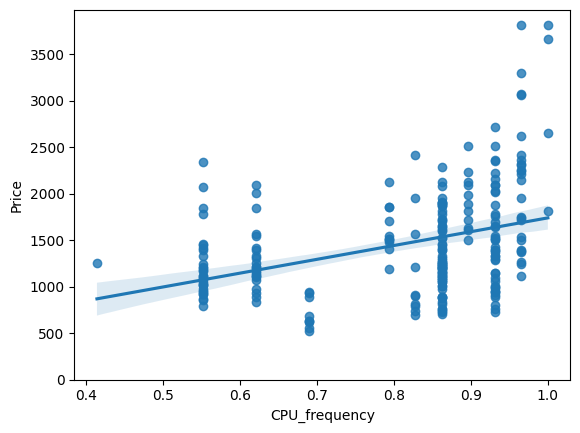

In [25]:
sns.regplot(data=df,x="CPU_frequency", y="Price")
plt.ylim(0,)
plt.show()

(0.0, 3974.15)

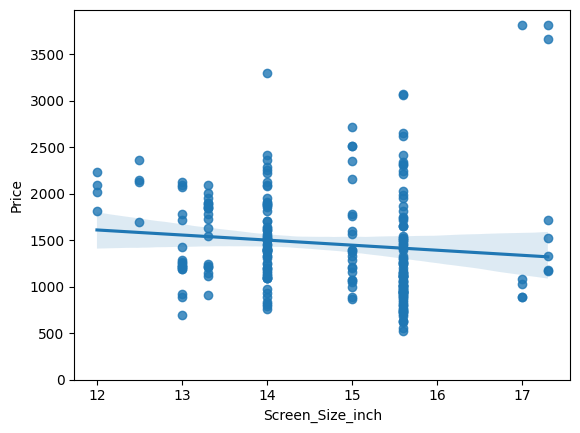

In [26]:

sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)


(0.0, 3974.15)

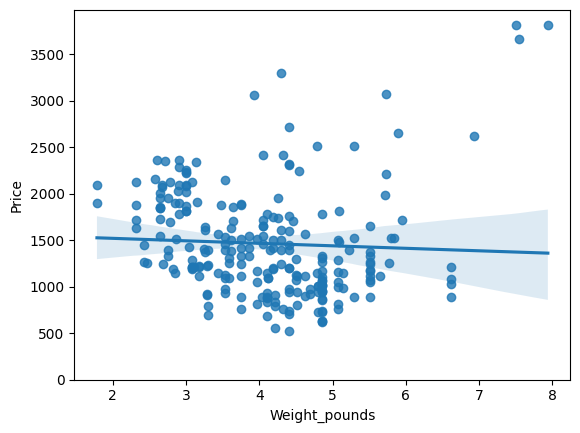

In [28]:

sns.regplot(x="Weight_pounds",y="Price", data =df)
plt.ylim(0,)


In [42]:
df[["Weight_pounds","Price"]].corr()


,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


In [43]:
df[["CPU_frequency","Price"]].corr()


,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


In [44]:
df[["Screen_Size_inch","Price"]].corr()


,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

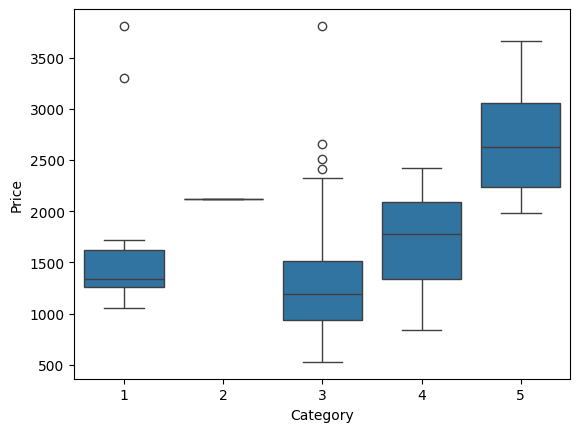

In [45]:
sns.boxplot(data=df,x="Category",y="Price")

<Axes: xlabel='GPU', ylabel='Price'>

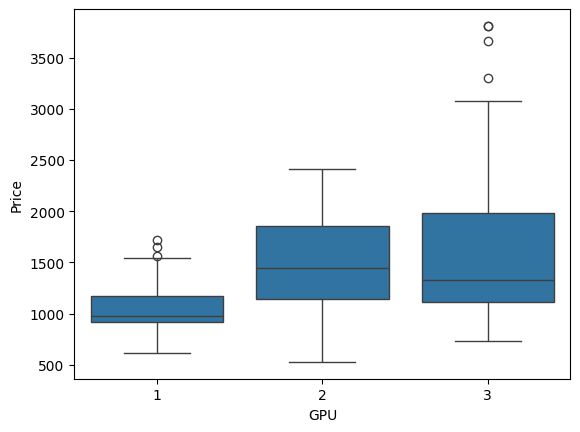

In [46]:
sns.boxplot(data=df,x="GPU",y="Price")

<Axes: xlabel='OS', ylabel='Price'>

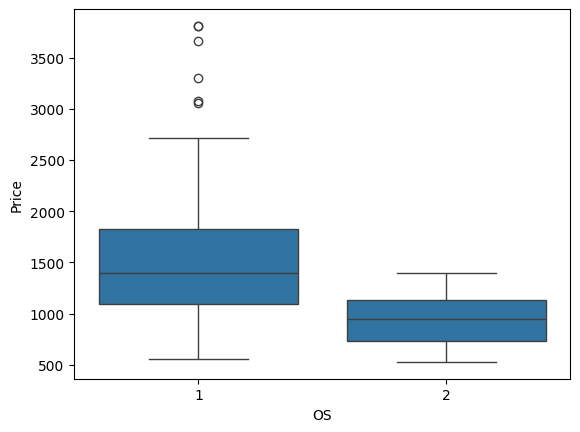

In [47]:
sns.boxplot(data=df,x="OS",y="Price")

<Axes: xlabel='CPU_core', ylabel='Price'>

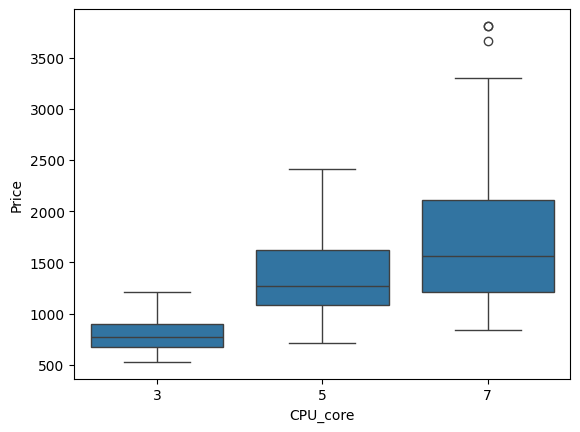

In [48]:
sns.boxplot(data=df,x="CPU_core" ,y="Price")

<Axes: xlabel='RAM_GB', ylabel='Price'>

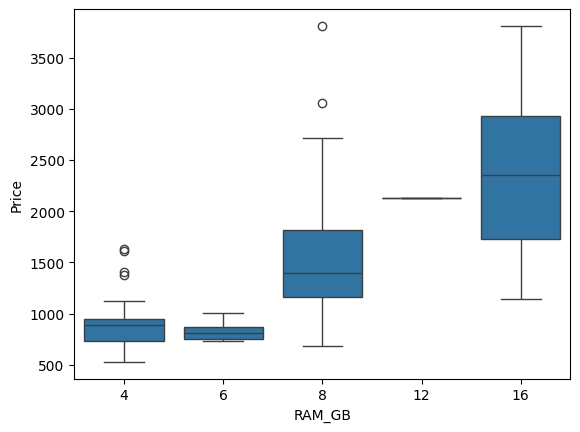

In [49]:
sns.boxplot(data=df,x= "RAM_GB",y="Price")

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

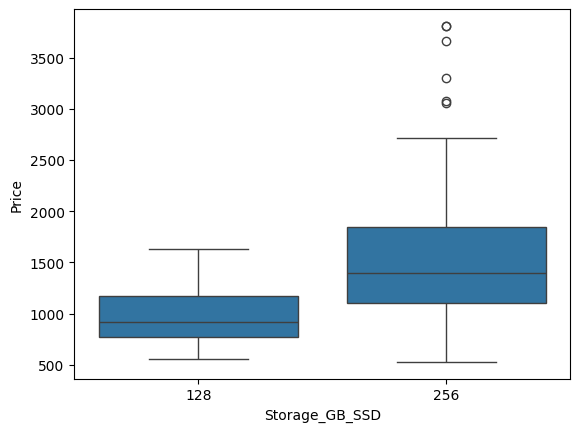

In [50]:
sns.boxplot(data=df,x="Storage_GB_SSD",y="Price")

#  Descriptive Statistical Analysis


In [51]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

# GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [56]:
df_test=df[[ "GPU", "CPU_core" , "Price"]]
test=df_test.groupby([ 'GPU', 'CPU_core' ],as_index=False).mean()
print(test)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [58]:
test_pivot=test.pivot(index='GPU',columns='CPU_core')
print(test_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


In [62]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.681560628842973e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713219e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191723976
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118273  with a P-value of P = 0.0885339784683062
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751551  with a P-value of P = 0.43976938534338894
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009359e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.000569664255924674
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  wi

<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|--!>
